In [1]:
import segmentation_models as sm
from tifffile import imread
import glob
import numpy as np
import torch

Define Model

In [2]:
model_architecture = 'UNet'
spatial_dims = 3
in_channels = 1
out_channels = 1
channels = [32, 128, 256]
strides = [2, 2]
kernel_size = 3

model = sm.Model(model_architecture, spatial_dims, in_channels, out_channels, channels, strides, kernel_size)

Load Model Weights

In [3]:
model_path = './benchmarking/saved_models/3D_unet_dice_lr_0.005_batch_1'
model.load_weights(model_path)

Set Image

In [4]:
test_image = 'uint8_ChaMARCM-F000157_seg001.lsm_c_3.tif.v3dpbd.tif'
model.set_image(test_image)
print(model.image.shape)

test_image = imread(test_image)
model.set_image(test_image)
print(model.image.shape)

test_image = torch.tensor(test_image)
model.set_image(test_image)
print(model.image.shape)

torch.Size([1, 1, 128, 128, 128])
torch.Size([1, 1, 128, 128, 128])
torch.Size([1, 1, 128, 128, 128])


Predict

In [5]:
model.predict()
print(model.prediction.shape)

torch.Size([1, 1, 128, 128, 128])


Evaluate

In [6]:
mask = 'BigN_maskuint8_ChaMARCM-F000157_seg001.lsm_c_3.tif.v3dpbd.ano_stamp_2015_06_15_17_40_output.tif'
model.set_mask(mask)
evals = model.get_evals()

In [7]:
evals

{'confusion matrix': {'TP': tensor(34.),
  'TN': tensor(2096378.),
  'FP': tensor(17.),
  'FN': tensor(723.)},
 'iou': tensor(0.0439),
 'precision': tensor(0.6667),
 'accuracy': tensor(0.9996)}

Plot

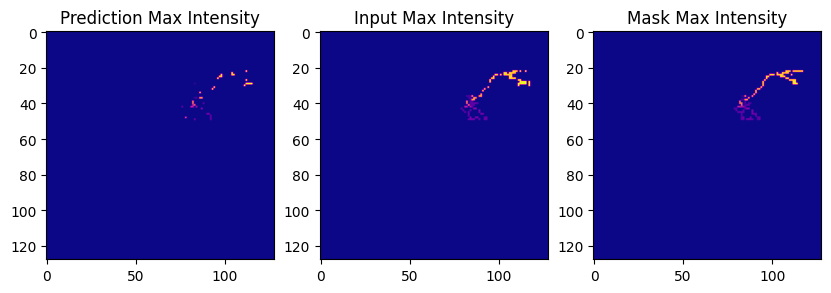

In [8]:
model.create_plots('plasma')